In [4]:
from math import pi, tan, sin, pow, sqrt
import numpy as np
import matplotlib.pyplot as plt
import copy

## Приближение функций. Численные дефференциирование и интегрирование

## Метод наименьших квадратов

In [5]:
x_star = 2.666667

x = [1,1.9,2.8,3.7,4.6,5.5]
y = [2.4142,1.0818,0.50953,0.11836,-0.24008,-0.66818]

x = [0,1,2,3,4,5,6,7,8,9,10]
y = [0,1,-1,2,-2,3,-3,4,-4,5,-5]

In [6]:
def make_spline_matrix(x, y, n, err=10**-5, text=False):
    # сделаем матрицу коэф а размерности n+1
    A, b, n = [], [], n+1
    for i in range(n):
        r = []
        for j in range(n):
            if i == 0 and j == 0:
                r.append(len(x))
            else:
                r.append(sum(map(lambda a: pow(a,i+j),x)))
        A.append(r)
        b.append(sum(map(lambda a,b: pow(a,i) * b,x,y)))
    if text:
        print('Matrix A and b')
        for i in range(len(A)):
            for j in range(len(A[i])):
                print('{:.2f}'.format(A[i][j]), end='  ')
            print('['+'{:.2f}'.format(b[i])+']')
    # Теперь имея матрицу и правую часть решим ее зейделем с точностью err
    a_,a = [None] * len(A),[0] * len(A)
    while True:
        for i in range(len(A)):
            s = 0
            for j in range(len(A)):
                if j < i:
                    s += A[i][j] * a_[j]
                elif i != j:
                    s += A[i][j] * a[j]
            a_[i] = (b[i] - s) / A[i][i]
        if sqrt(sum(map(lambda a,b: pow(a - b,2),a,a_))) < err:
            break
        a = copy.copy(a_)
    if text:
        print('f(x) = ', float('{:.4f}'.format(a_[0])), end='')
        for i in range(1, len(a_)):
            print(' +', str(float('{:.4f}'.format(a_[i]))) + '*x^' + str(i),end='')
        print()
    # теперь сделаем итоговые координаты
    resx,resy = [],[]
    start = x[0]
    while start < x[-1]:
        resx.append(start)
        resy.append(sum([a_[j] * pow(start, j) for j in range(len(a_))]))
        start += 0.1 # сделать другой step
    # вычислим квадрат ошибок
    # if text:
    yy = [sum([a_[j] * pow(num, j) for j in range(len(a_))]) for num in x]
    print('n =', n-1, 'error =', sqrt(sum(list(map(lambda a, b: pow(a - b,2), yy, y)))))
    return resx, resy

In [7]:
x_1, y_1 = make_spline_matrix(x, y, 1)
x_2, y_2 = make_spline_matrix(x, y, 2)
x_3, y_3 = make_spline_matrix(x, y, 3)

n = 1 error = 10.390117682481664
n = 2 error = 10.21904617369133
n = 3 error = 9.993007263836287


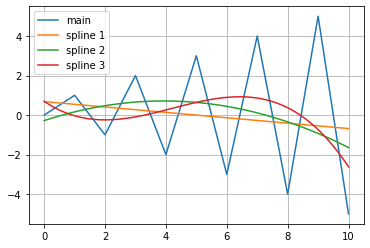

In [8]:
plt.plot(x, y, label='main')
plt.plot(x_1, y_1, label='spline 1')
plt.plot(x_2, y_2, label='spline 2')
plt.plot(x_3, y_3, label='spline 3')
plt.legend()
plt.grid()